# Case Study 5.1 - 01 Principal Components

We start our chapter on explaining language models by using principal components to determine the strongest semantic separations within the semantic vectors.

**Note:** To run the Notebooks for this chapter you will need to copy the `data` directory from [Chapter 04](../chapter_04) into the directory for Chapter 05. This chapter builds on some of the results and intermediate files from the preceding chapter

The original script for the content of this Notebook can be found here:

* [CaseStudy_5.1_01-01.py](CaseStudy_5.1_01-01.py)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.patches
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("data/clustered_data.csv")
embeddings = "Embeddings_bert-base-uncased.npy"

def expand_array_col(df, col_name):
    expanded = df[col_name].apply(pd.Series)
    expanded.columns = [f'{col_name}_{i+1}' for i in range(expanded.shape[1])]
    df_expanded = pd.concat([df.drop(col_name, axis=1), expanded], axis=1)
    return df_expanded, expanded.columns

embs = np.load(embeddings, allow_pickle=True,)
df["embedding"] = list(embs)
newdf, cols = expand_array_col(df, "embedding")

In [ ]:
tdf = pd.read_csv("data/topic_labels.csv")
topics = tdf.set_index('ID')['Topic Name'].to_dict()
def topic_lookup(c):
    return topics[c]

In [ ]:
X = newdf.loc[:,cols]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

transformed_data = pca.transform(scaled_data)

In [ ]:
df['dim1'] = transformed_data[:,0]
df['dim2']=  transformed_data[:,1]

markers = {0: 'v', 1: '^', 2:'*', 3:'x', 4:'d', 5:'o', 6:'+'}
gen_labels = {0: 'Human', 1: 'AI'}

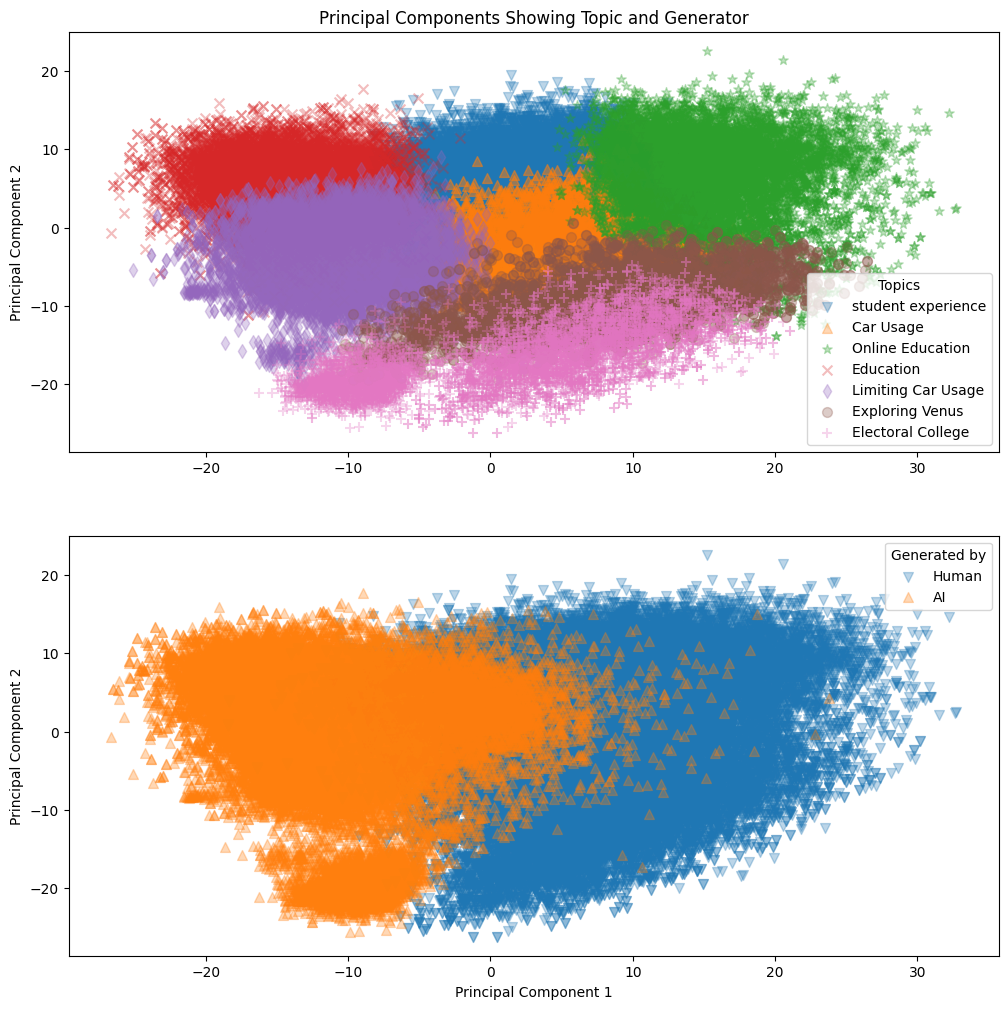

In [11]:
plt.rcParams['figure.figsize'] = [12, 12]

fig, axes = plt.subplots(2, 1)

for c, group_data in df.groupby('cluster'):
    axes[0].scatter(group_data['dim1'], group_data['dim2'],
         marker=markers[c], alpha=0.3,
         label=topic_lookup(c), s=50)

axes[0].legend(title='Topics')
axes[0].set_ylabel('Principal Component 2')
axes[0].set_title('Principal Components Showing Topic and Generator')

for g, group_data in df.groupby('generated'):
    axes[1].scatter(group_data['dim1'], group_data['dim2'],
               marker=markers[g], alpha=0.3,
               label=gen_labels[g], s=50) # s for marker size

axes[1].legend(title='Generated by')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()